In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.preprocessing import label_binarize

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
class_names = digits.target_names

In [3]:
y_bin = label_binarize(y, classes=np.unique(y))


In [4]:
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y, y_bin, test_size=0.2, random_state=42, stratify=y)

In [5]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [6]:
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)


In [7]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  1  0 35]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                 

In [8]:
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print("ROC-AUC Score (OvR):", roc_auc)

ROC-AUC Score (OvR): 0.9999226216855848


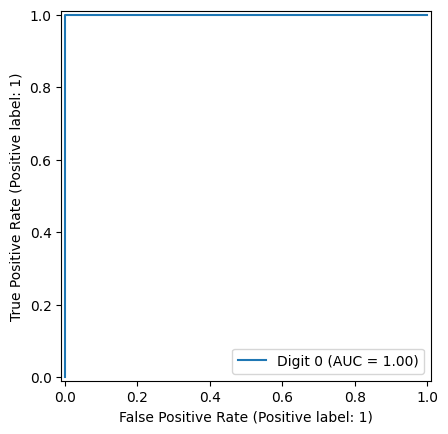

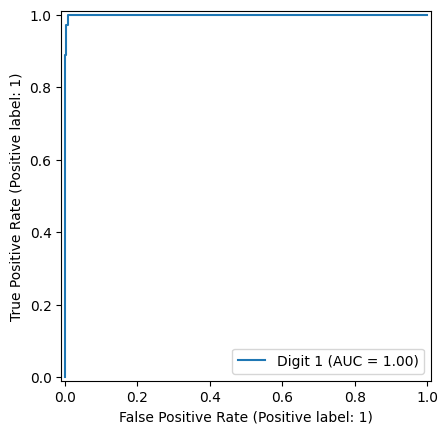

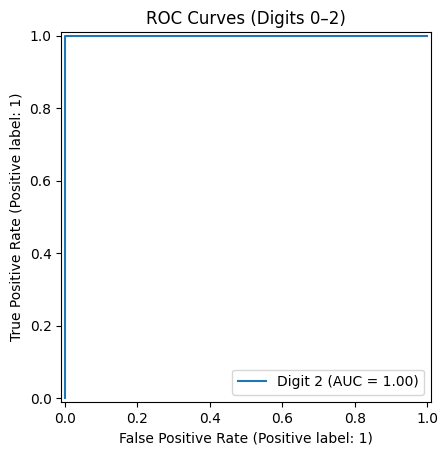

In [9]:
RocCurveDisplay.from_predictions(y_test_bin[:, 0], y_proba[:, 0], name='Digit 0')
RocCurveDisplay.from_predictions(y_test_bin[:, 1], y_proba[:, 1], name='Digit 1')
RocCurveDisplay.from_predictions(y_test_bin[:, 2], y_proba[:, 2], name='Digit 2')
plt.title("ROC Curves (Digits 0–2)")
plt.show()